In [59]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import pandas as pd


In [60]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets , svm
from sklearn.metrics import accuracy_score , classification_report
from sklearn.model_selection import train_test_split

In [61]:
np.random.seed(0)
np.random.rand(3)

array([0.5488135 , 0.71518937, 0.60276338])

In [62]:
iris = datasets.load_iris()
iris



{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [63]:

np.random.seed(0)   #like random state
X,y = iris.data , iris.target
indices = np.random.permutation(len(X))    #all the permutations of the len(X) 
indices

array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52,   3, 149,  98,
         6,  68, 109,  96,  12, 102, 120, 104, 128,  46,  11, 110, 124,
        41, 148,   1, 113, 139,  42,   4, 129,  17,  38,   5,  53, 143,
       105,   0,  34,  28,  55,  75,  35,  23,  74,  31, 118,  57, 131,
        65,  32, 138,  14, 122,  19,  29, 130,  49, 136,  99,  82,  79,
       115, 145,  72,  77,  25,  81, 140, 142,  39,  58,  88,  70,  87,
        36,  21,   9, 103,  67, 117,  47])

In [64]:
X_train = X[indices[:-30]]
y_train = y[indices[:-30]]
X_test = X[indices[-30:]]
y_test = y[indices[-30:]]

In [65]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [66]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [67]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
result = clf.predict([[3,5,4,2],])  #2D array has to be given
print(iris.target_names[result])

['virginica']


In [69]:
result = clf.predict([[3,5,4,2],[3,1,0,1]])
print(iris.target_names[result])

['virginica' 'setosa']


In [70]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9333333333333333


In [71]:
target_names = iris.target_names
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.82      0.90        11
   virginica       0.82      1.00      0.90         9

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [72]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [73]:
df['Class'].value_counts()   #highly biased

2    458
4    241
Name: Class, dtype: int64

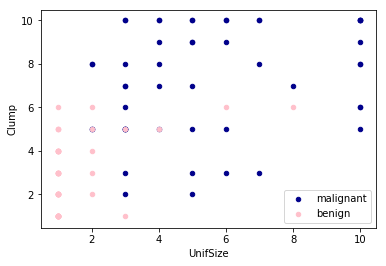

In [74]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter',x='UnifSize',
                                    y='Clump',color='DarkBlue',label='malignant');
   
df[df['Class'] == 2][0:50].plot(kind='scatter',x='UnifSize',
                                    y='Clump',color='Pink',label='benign',ax=ax);
 
    
#can take x as clump and y as unifsize too and the observation is that for lower clump and unifsize it is benign     

In [75]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [76]:
df[df['BareNuc'].notnull()]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [77]:
df = df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
#coerce means for eg:float to int where float has ? then NaN will be imputed there
df['BareNuc'] = df['BareNuc'].astype('int')

In [78]:
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [79]:
df['BareNuc'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [80]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [81]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [83]:
df['Class'].dtypes

dtype('int64')

In [87]:
df['Class'] = df['Class'].astype('int')  #int64 to int conversion
y = np.asarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [88]:
y.dtype

dtype('int32')

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [91]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [92]:
print(X_train.shape,y_train.shape)

(546, 9) (546,)


In [93]:
print(X_test.shape,y_test.shape)

(137, 9) (137,)


In [94]:
yhat = clf.predict(X_test)

In [102]:
yhat[0:5]

array([2, 4, 2, 4, 4])

In [96]:
from sklearn.metrics import classification_report , confusion_matrix
confusion_matrix = confusion_matrix(y_test,yhat)
print(confusion_matrix)

[[73  5]
 [ 0 59]]
